Reading the Dataset and Selecting the Numerical Column

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Load the dataset
file_path = "/content/supermarket_sales -.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(None,
     Invoice ID Branch       City Customer type  Gender  \
 0  750-67-8428      A     Yangon        Member  Female   
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 4  373-73-7910      A     Yangon        Normal    Male   
 
              Product line  Unit price  Quantity   Tax 5%     Total       Date  \
 0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
 1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
 2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
 3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
 4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
 
     Time      Payment    cogs  gross margin percentage  gross income  Rating  
 0  13:08      Ewallet  522.83                 4.761905       2

Histogram of Sample Means & Central Limit Theorem (CLT) Verification

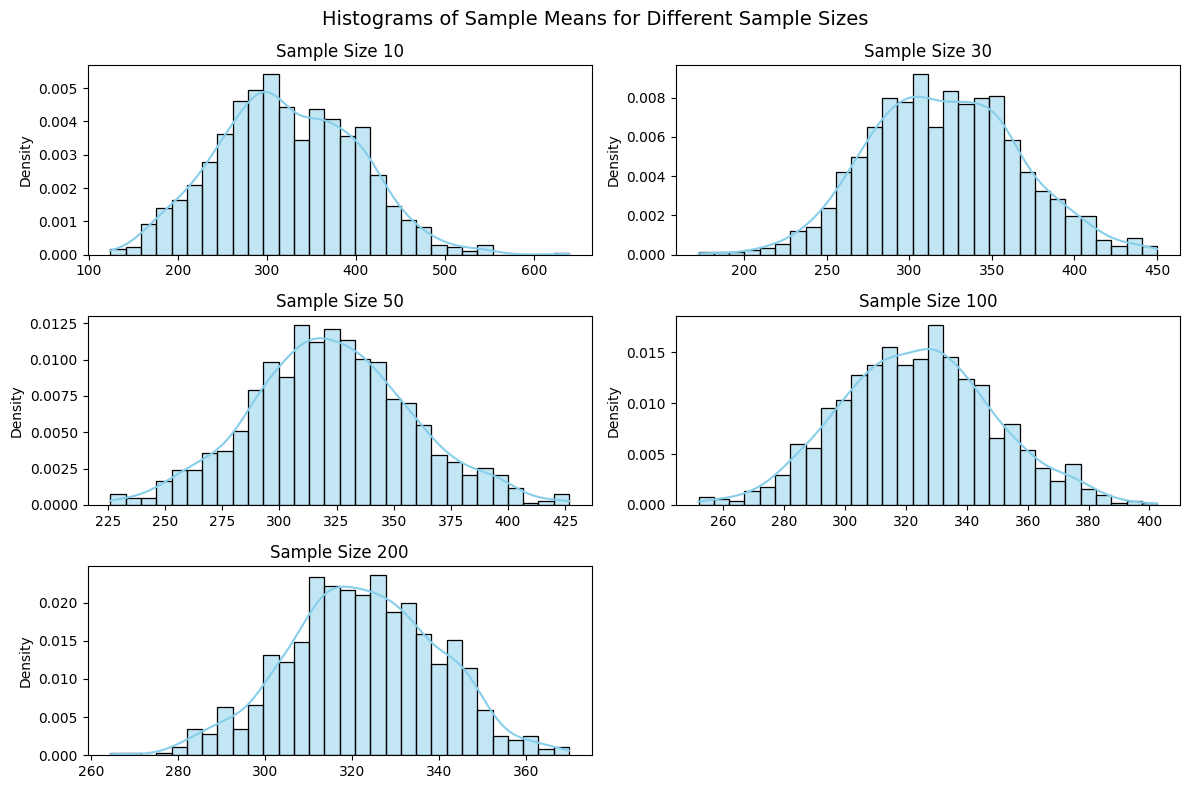

In [4]:
# Select the 'Total' column for analysis
data = df["Total"].dropna()

# Compute sample means for different sample sizes
sample_sizes = [10, 30, 50, 100, 200]
sample_means = {size: [np.mean(np.random.choice(data, size=size, replace=True)) for _ in range(1000)] for size in sample_sizes}

# Plot histograms of sample means for different sample sizes
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes, 1):
    plt.subplot(3, 2, i)
    sns.histplot(sample_means[size], bins=30, kde=True, stat="density", color='skyblue', edgecolor='black')
    plt.title(f"Sample Size {size}")

plt.suptitle("Histograms of Sample Means for Different Sample Sizes", fontsize=14)
plt.tight_layout()
plt.show()

Summary Statistics (Mean and Standard Deviation Calculation)

In [5]:
# Compute mean and standard deviation of 'Total' column
mean_total = np.mean(data)
std_total = np.std(data, ddof=1)  # Using sample standard deviation

mean_total, std_total


(322.966749, 245.88533510097207)

Comparison of Histogram with Normal Distribution

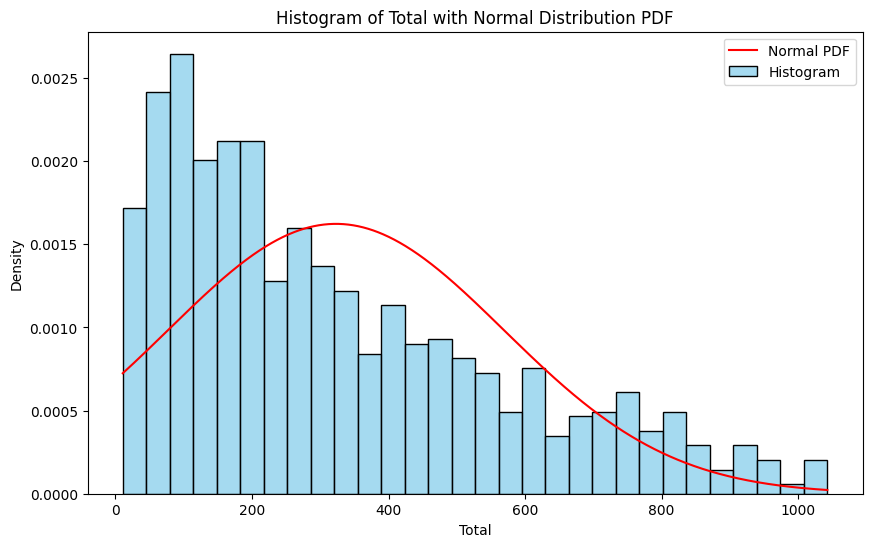

In [6]:
# Plot histogram of original data with PDF overlay
plt.figure(figsize=(10, 6))

# Histogram of the original data
sns.histplot(data, bins=30, kde=False, color='skyblue', stat="density", edgecolor='black', label="Histogram")

# Plot normal distribution PDF
x_values = np.linspace(min(data), max(data), 1000)
pdf_values = norm.pdf(x_values, mean_total, std_total)
plt.plot(x_values, pdf_values, color='red', label="Normal PDF")

plt.title("Histogram of Total with Normal Distribution PDF")
plt.xlabel("Total")
plt.ylabel("Density")
plt.legend()
plt.show()


Generating Random Samples from a Normal Distribution and Plotting Histogram

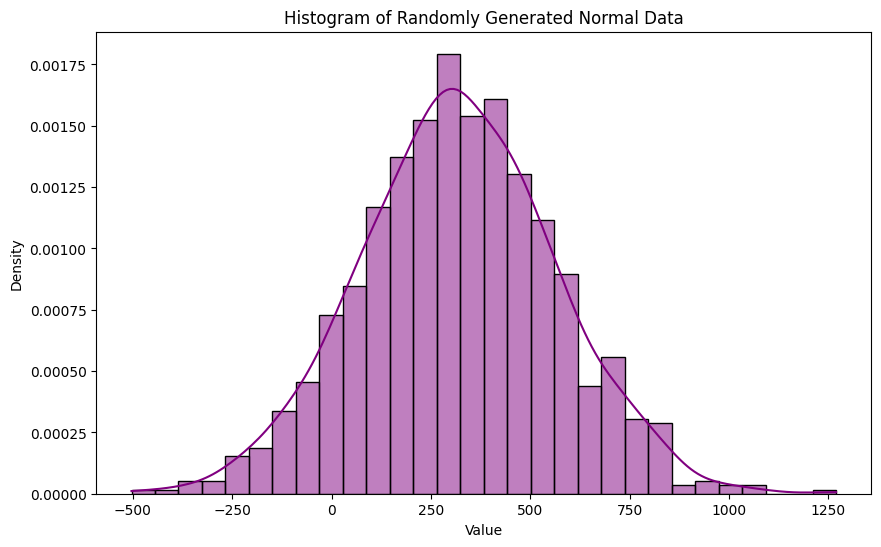

In [7]:
# Generate 1000 random numbers from a normal distribution with same mean and std deviation
random_samples = np.random.normal(mean_total, std_total, 1000)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(random_samples, bins=30, kde=True, color='purple', edgecolor='black', stat="density")

plt.title("Histogram of Randomly Generated Normal Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


Cumulative Probability (CDF) - Probability of a Value Below the Mean


In [8]:
# Compute cumulative probability (CDF) for value less than the dataset's mean
cdf_value = norm.cdf(mean_total, mean_total, std_total)
cdf_value


0.5

Quantile Analysis - Finding the 95th Percentile


In [9]:
# Compute the 95th percentile (quantile function)
percentile_95 = norm.ppf(0.95, mean_total, std_total)
percentile_95


727.412134255012

Probability Density Function Plot


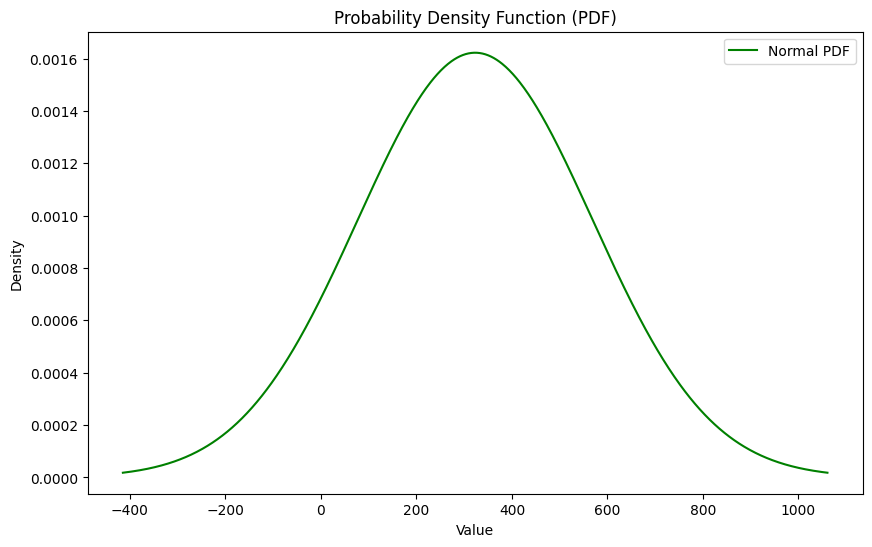

In [10]:
# Compute and plot PDF for different values
x_values = np.linspace(mean_total - 3*std_total, mean_total + 3*std_total, 1000)
pdf_values = norm.pdf(x_values, mean_total, std_total)

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color='green', label="Normal PDF")
plt.title("Probability Density Function (PDF)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


Skewness and Kurtosis Analysis for CLT Verification


In [11]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis for the original data
original_skewness = skew(data)
original_kurtosis = kurtosis(data)

# Compute skewness and kurtosis for sample means of different sample sizes
sample_stats = {size: (skew(sample_means[size]), kurtosis(sample_means[size])) for size in sample_sizes}

original_skewness, original_kurtosis, sample_stats


(0.8912303920037631,
 -0.08746991289329031,
 {10: (0.1671233047742271, -0.17527908955862692),
  30: (0.1132279879606624, -0.12194090445523598),
  50: (0.11320568229087115, -0.027383151038698816),
  100: (0.09377183746058726, -0.13119565300461078),
  200: (-0.05357958436088593, -0.15498566797807367)})

Finding the 99th Percentile Using the Z-Score

In [12]:
# Compute the value at which 99% of observations fall below (99th percentile)
percentile_99 = norm.ppf(0.99, mean_total, std_total)
percentile_99


894.981575569966